In [40]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [41]:
tk = th.Thicket.from_caliperreader(glob("CombinedSpeedup/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 143/143 [00:00<00:00, 149.50it/s]
/home/ado/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [42]:
tk.metadata.head(10)

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source,scalability
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32061621,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p512-a268435456-smerge-isorted.cali,true,true,true,true,1729627916,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, merge, sorted]",c,merge,mpi,int,4,268435456,sorted,512,8,online,weak
46577508,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p2-a268435456-sradix-ireverse.cali,true,true,true,true,1729634343,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, radix, reverse]",c,radix,mpi,int,4,268435456,reverse,2,8,online,NaN
47621072,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p4-a268435456-smerge-ireverse.cali,true,true,true,true,1729627925,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, merge, reverse]",c,merge,mpi,int,4,268435456,reverse,4,8,online,weak
102546201,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p4-a268435456-ssample-isorted.cali,true,true,true,true,1729585098,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, sorted]",c,sample,mpi,int,4,268435456,sorted,4,8,online,strong
118073539,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p2-a268435456-ssample-ireverse.cali,true,true,true,true,1729582672,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, reverse]",c,sample,mpi,int,4,268435456,reverse,2,8,online,strong
165025109,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p8-a268435456-sbitonic-ireverse.cali,true,true,true,true,1729577759,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, bitonic, reverse]",c,bitonic,mpi,int,4,268435456,reverse,8,8,online,weak
209114087,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p16-a268435456-sbitonic-irandom.cali,true,true,true,true,1729578044,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, bitonic, random]",c,bitonic,mpi,int,4,268435456,random,16,8,online,weak
295141015,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a268435456-sradix-isorted.cali,true,true,true,true,1729644651,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, radix, sorted]",c,radix,mpi,int,4,268435456,sorted,64,8,online,NaN
311939468,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p8-a268435456-ssample-ireverse.cali,true,true,true,true,1729585156,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, reverse]",c,sample,mpi,int,4,268435456,reverse,8,8,online,strong


In [43]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1146.387 main
├─ 1140.800 MPI_Comm_dup
├─ 0.126 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.223 comm
│  ├─ 0.129 comm_large
│  │  ├─ nan MPI_Allreduce
│  │  ├─ nan MPI_Alltoall
│  │  ├─ nan MPI_Alltoallv
│  │  ├─ nan MPI_Bcast
│  │  ├─ 0.044 MPI_Gather
│  │  ├─ nan MPI_Gatherv
│  │  ├─ 0.086 MPI_Scatter
│  │  ├─ nan MPI_Scatterv
│  │  └─ nan MPI_Sendrecv
│  └─ 0.094 comm_small
│     ├─ nan MPI_Barrier
│     └─ 0.094 MPI_Bcast
├─ 2.495 comp
│  ├─ 2.218 comp_large
│  └─ 0.277 comp_small
├─ 0.014 correctness_check
└─ 0.839 data_init_runtime
   └─ 0.828 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 1146.39 indices: {'profile': np.int64(32061621)})
█ 1031.75 - 1146.39
█ 802.47 - 1031.75
█ 573.19 - 802.47
█ 343.92 - 573.19
█ 114.64 - 

In [44]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("algorithm")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size,algorithm
0,"{'name': 'main', 'type': 'function'}",32061621,1.0,regionprofile,1146.320955,1146.435964,1146.386883,586950.084146,0.001381,1.750429,1.974474,1.889672,967.511834,NaN,NaN,NaN,NaN,main,512,sorted,268435456,merge
1,"{'name': 'main', 'type': 'function'}",46577508,1.0,regionprofile,337.344901,337.346301,337.345601,674.691202,0.000000,6.054079,304.908617,155.481348,310.962695,NaN,NaN,NaN,NaN,main,2,reverse,268435456,radix
2,"{'name': 'main', 'type': 'function'}",47621072,1.0,regionprofile,59.720223,59.723515,59.722489,238.889956,0.000002,0.542323,0.545695,0.544157,2.176628,NaN,NaN,NaN,NaN,main,4,reverse,268435456,merge
3,"{'name': 'main', 'type': 'function'}",102546201,1.0,regionprofile,59.591044,59.591087,59.591066,238.364263,0.000000,0.589712,0.597223,0.591908,2.367632,NaN,NaN,NaN,NaN,main,4,sorted,268435456,sample
4,"{'name': 'main', 'type': 'function'}",118073539,1.0,regionprofile,98.699066,98.699071,98.699068,197.398137,0.000000,0.737181,0.742511,0.739846,1.479693,NaN,NaN,NaN,NaN,main,2,reverse,268435456,sample


In [45]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

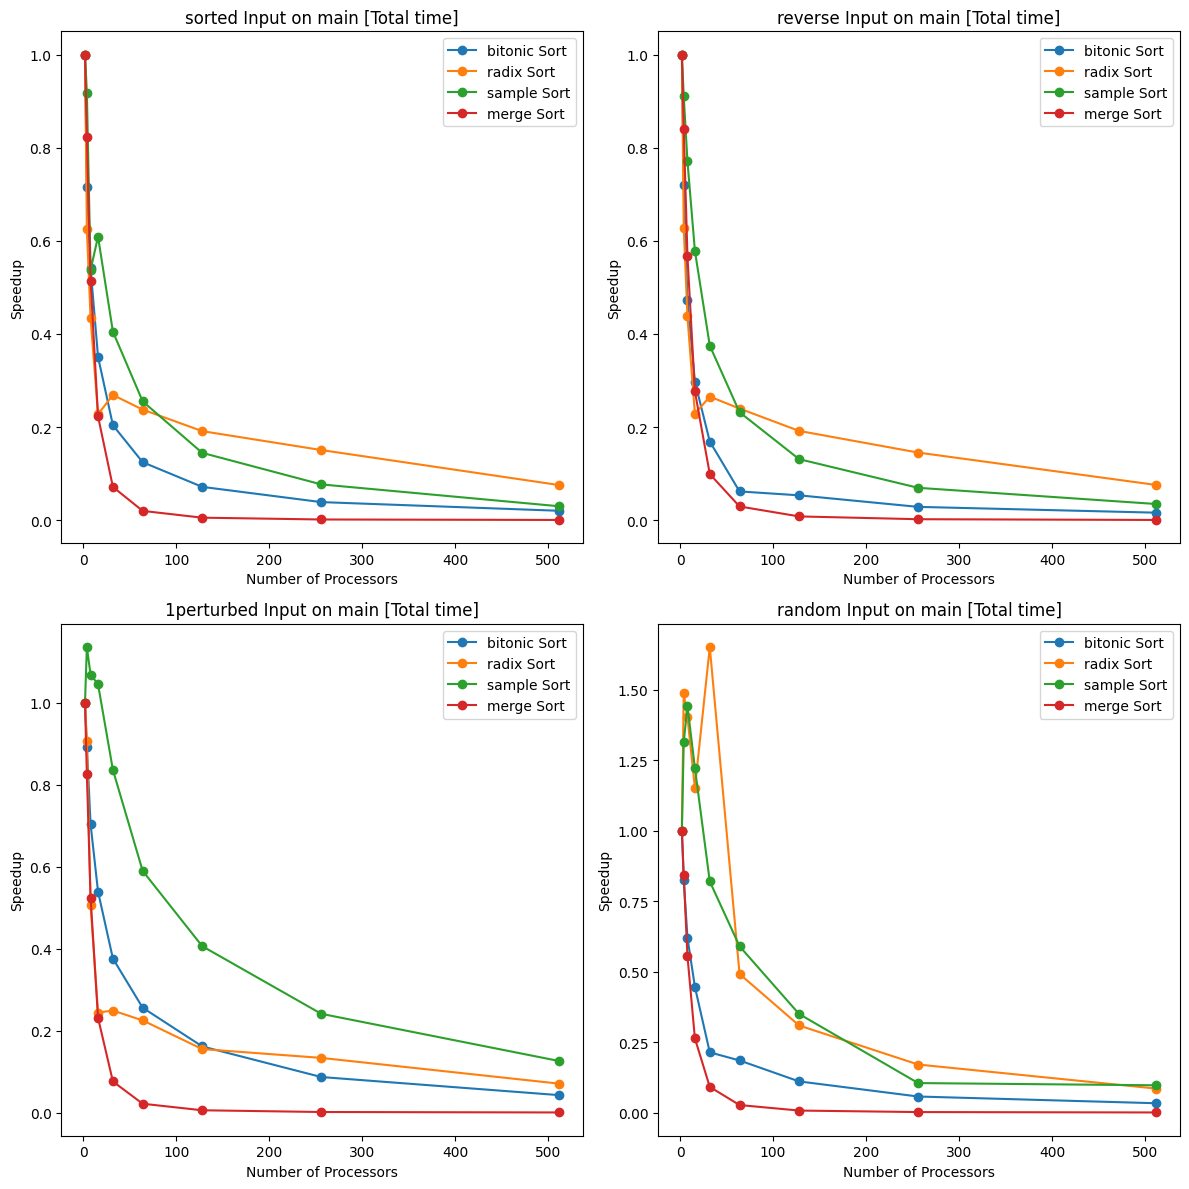

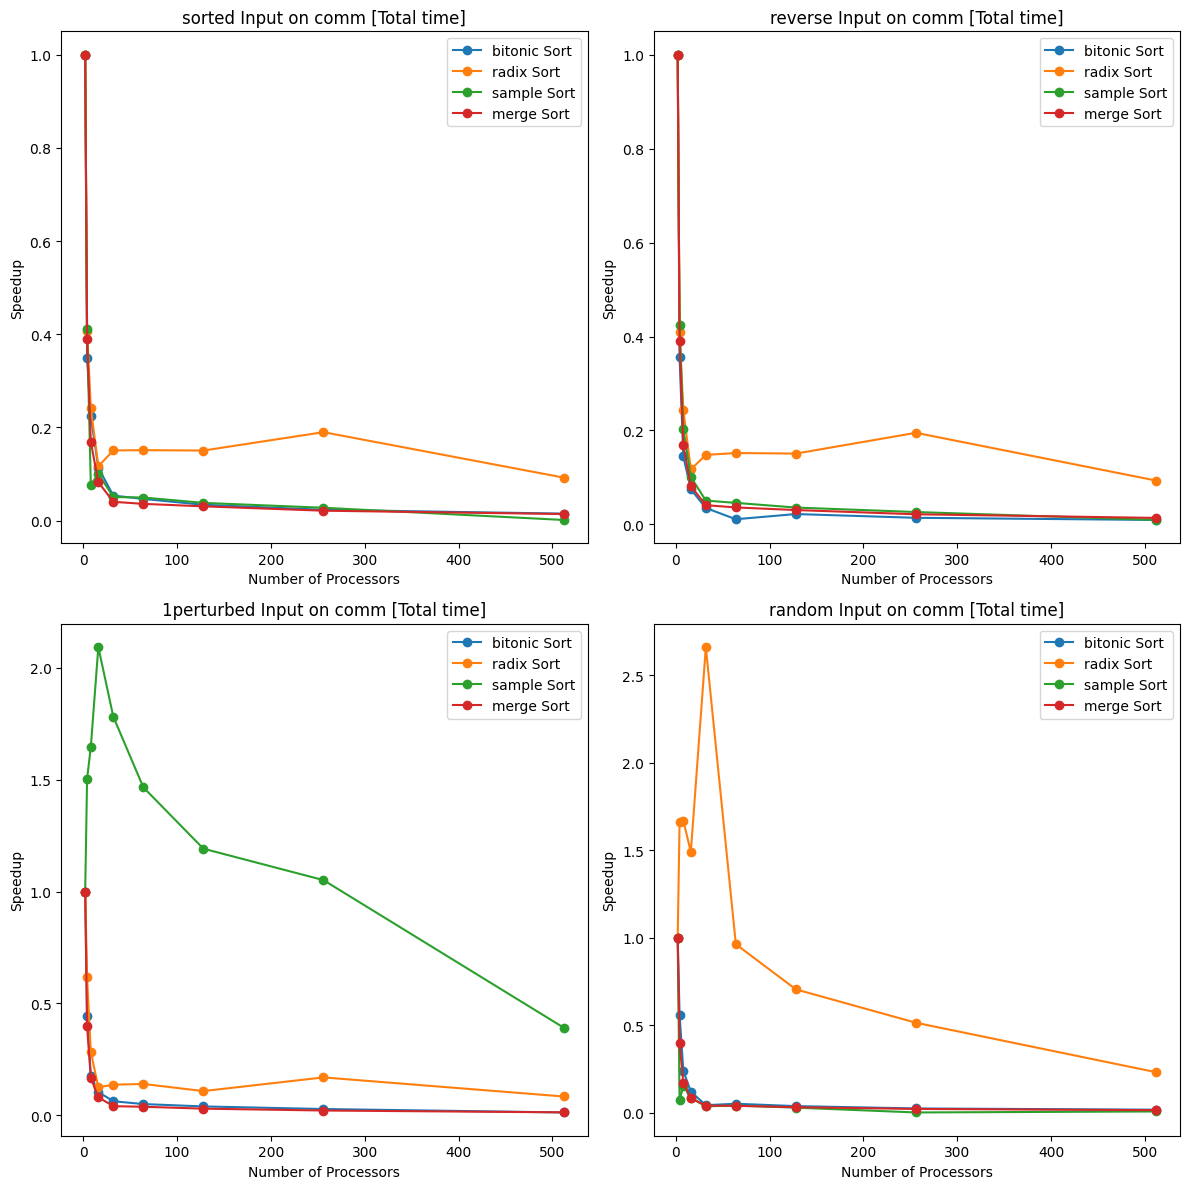

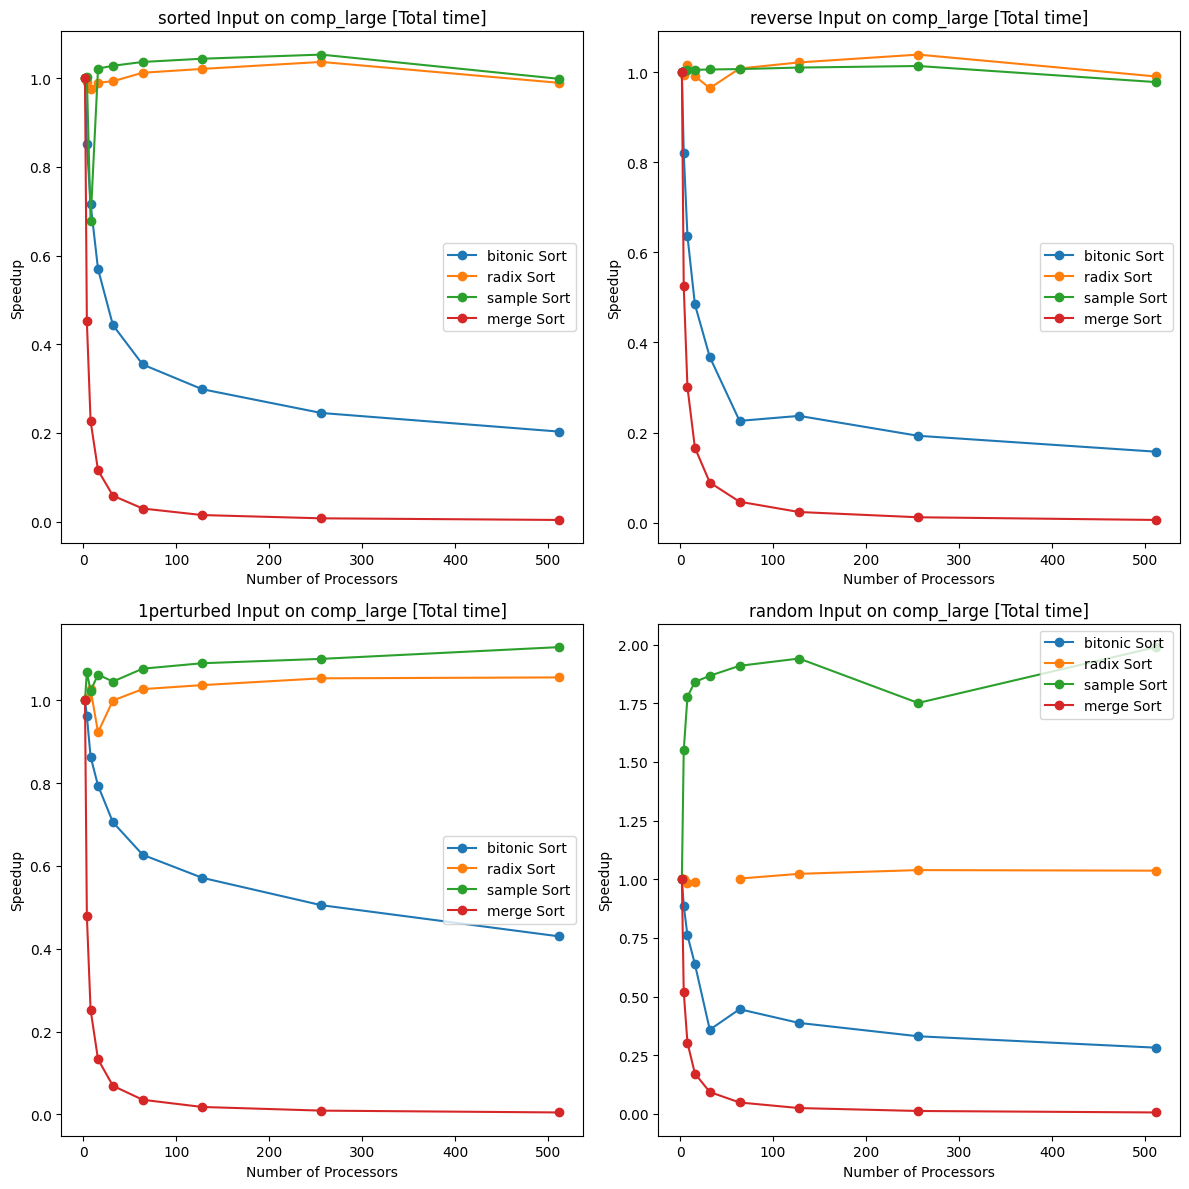

In [48]:
import os

input_sizes = [268435456]  # Largest problem size
input_types = ["sorted", "reverse", "1perturbed", "random"]
sorting_algorithms = ["bitonic", "radix", "sample", "merge"]
target_nodes = ["main", "comm", "comp_large"]

# Adjust as needed: index for time type to measure (e.g., max, min, avg)
time_types = ["Min time/rank", "Max time/rank", "Avg time/rank", "Total time", "Variance time/rank"]
file_output_label = ["min", "max", "avg", "total", "variance"]
type_selector = 3  # Set based on which time type is required

# Output folder
output_dir = '../plot_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plotting function for each node with 4 subplots (one for each input type)
def plot_speedup(tk, input_types):
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if node_name not in target_nodes:
            continue
            
        fig, axs = plt.subplots(2, 2, figsize=(12, 12))
        axs = axs.flatten()
        
        for idx, input_type in enumerate(input_types):
            ax = axs[idx]
            
            for input_size in input_sizes:
                for algorithm in sorting_algorithms:
                    # Get algorithm-specific baseline
                    baseline_time = tk.dataframe[
                        (tk.dataframe["num_procs"] == 2) & 
                        (tk.dataframe["input_type"] == input_type) &
                        (tk.dataframe["algorithm"] == algorithm) &
                        (tk.dataframe["node"] == node)
                    ][time_types[type_selector]].values[0]
                    
                    data = tk.dataframe[
                        (tk.dataframe["input_type"] == input_type) &
                        (tk.dataframe["input_size"] == input_size) &
                        (tk.dataframe['node'] == node) &
                        (tk.dataframe['algorithm'] == algorithm)
                    ]
                    data = data.sort_values(by="num_procs")
                    
                    speedup = baseline_time / data[time_types[type_selector]]
                    ax.plot(data["num_procs"], speedup, marker='o', label=f'{algorithm} Sort')
                
                ax.set_title(f'{input_type} Input on {node_name} [{time_types[type_selector]}]')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Speedup')
                ax.legend()
                
        for j in range(idx + 1, len(axs)):
            fig.delaxes(axs[j])
            
        plt.tight_layout()
        filename = f'speedup_{file_output_label[type_selector]}_{node_name}_input_types_corrected.png'
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, format='png', dpi=300)
        plt.show()

# Call the plotting function
plot_speedup(tk, input_types)


In [47]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe.head(10)

,index,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size,algorithm
0,0,"{'name': 'main', 'type': 'function'}",32061621,1.0,regionprofile,1146.320955,1146.435964,1146.386883,586950.084146,0.001381,1.750429,1.974474,1.889672,967.511834,NaN,NaN,NaN,NaN,main,512,sorted,268435456,merge
1,1,"{'name': 'main', 'type': 'function'}",46577508,1.0,regionprofile,337.344901,337.346301,337.345601,674.691202,0.000000,6.054079,304.908617,155.481348,310.962695,NaN,NaN,NaN,NaN,main,2,reverse,268435456,radix
2,2,"{'name': 'main', 'type': 'function'}",47621072,1.0,regionprofile,59.720223,59.723515,59.722489,238.889956,0.000002,0.542323,0.545695,0.544157,2.176628,NaN,NaN,NaN,NaN,main,4,reverse,268435456,merge
3,3,"{'name': 'main', 'type': 'function'}",102546201,1.0,regionprofile,59.591044,59.591087,59.591066,238.364263,0.000000,0.589712,0.597223,0.591908,2.367632,NaN,NaN,NaN,NaN,main,4,sorted,268435456,sample
4,4,"{'name': 'main', 'type': 'function'}",118073539,1.0,regionprofile,98.699066,98.699071,98.699068,197.398137,0.000000,0.737181,0.742511,0.739846,1.479693,NaN,NaN,NaN,NaN,main,2,reverse,268435456,sample
5,5,"{'name': 'main', 'type': 'function'}",165025109,1.0,regionprofile,25.349132,25.352141,25.351094,202.808755,0.000001,1.233769,1.248979,1.241377,9.931019,NaN,NaN,NaN,NaN,main,8,reverse,268435456,bitonic
6,6,"{'name': 'main', 'type': 'function'}",209114087,1.0,regionprofile,28.032671,28.036947,28.035117,448.561872,0.000002,1.331072,1.343062,1.335912,21.374595,NaN,NaN,NaN,NaN,main,16,random,268435456,bitonic
7,7,"{'name': 'main', 'type': 'function'}",295141015,1.0,regionprofile,44.203063,44.224099,44.213354,2829.654649,0.000038,1.848411,32.934811,3.823491,244.703456,NaN,NaN,NaN,NaN,main,64,sorted,268435456,radix
8,8,"{'name': 'main', 'type': 'function'}",311939468,1.0,regionprofile,32.002383,32.006887,32.004114,256.032914,0.000003,0.684047,0.691001,0.687540,5.500316,NaN,NaN,NaN,NaN,main,8,reverse,268435456,sample
9,9,"{'name': 'main', 'type': 'function'}",363241510,1.0,regionprofile,29.262373,29.269282,29.266739,936.535649,0.000005,2.086227,2.150199,2.100865,67.227673,NaN,NaN,NaN,NaN,main,32,random,268435456,bitonic
